## Audio Preprocessing 

This notebook attempts to get the MFCC plots of input audio files,
then extract square pieces of the plot as final input for a neural net.
Mainly based on Tutorial at https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [1]:
import librosa
import librosa.display

import matplotlib.pyplot as plt

In [2]:
ls data/pump/id_00/abnormal/00000001.wav

data/pump/id_00/abnormal/00000001.wav


In [3]:
audio_path = 'data/pump/id_00/normal/00000000.wav'

y , sr = librosa.load(audio_path)

#print(type(x), type(sr),)
print(f"\nWav file array shape is: {y.shape}\nsampling rate is: {sr}")


Wav file array shape is: (220500,)
sampling rate is: 22050


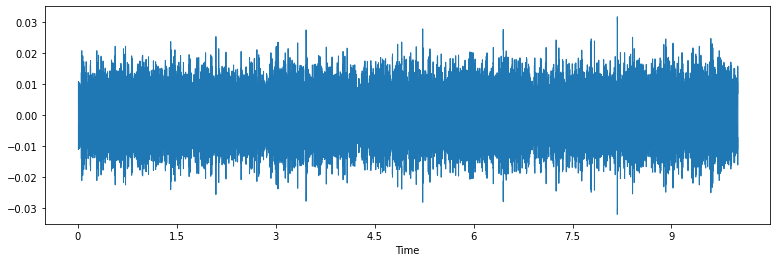

In [4]:
#display waveform
%matplotlib inline

plt.figure(figsize=(13, 4))
librosa.display.waveshow(y, sr=sr)

These Audio Clips are over 10 minutes long. Should definitely clip down to an easy 1 minute.

In [5]:
Y = librosa.stft(y) # short time Ft
Ydb = librosa.amplitude_to_db(abs(Y)) # does dB scaling of the spectro

Turns out librosa has a amp to dB scaling func for the spectrogram

### Normal Librosa Spectrogram 

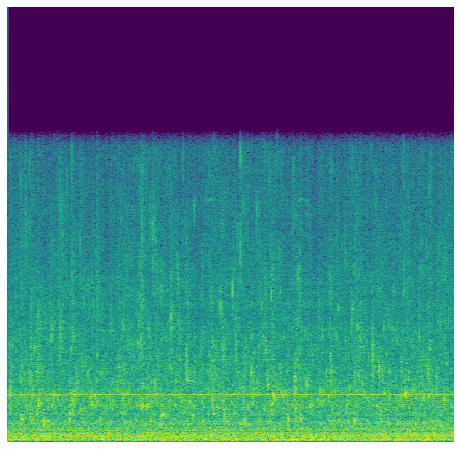

In [6]:
#display Spectrogram
plt.figure(figsize=(8, 8))
fig = librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz',cmap='viridis') 
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

Why does this look so much nicer than my other spectro. Also how to cut off the useless frequencies?

### Librosa MFCCS

(20, 431)


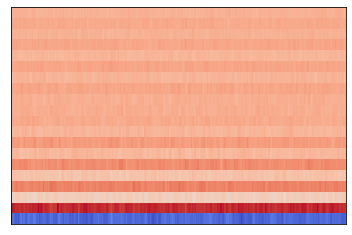

In [7]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape) #Displaying  the MFCCs:

fig = librosa.display.specshow(data=mfccs, sr=sr, x_axis='time')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

Save and crop or crop and save? Apparently I can't change the colormap of this one.